# Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats

## a)

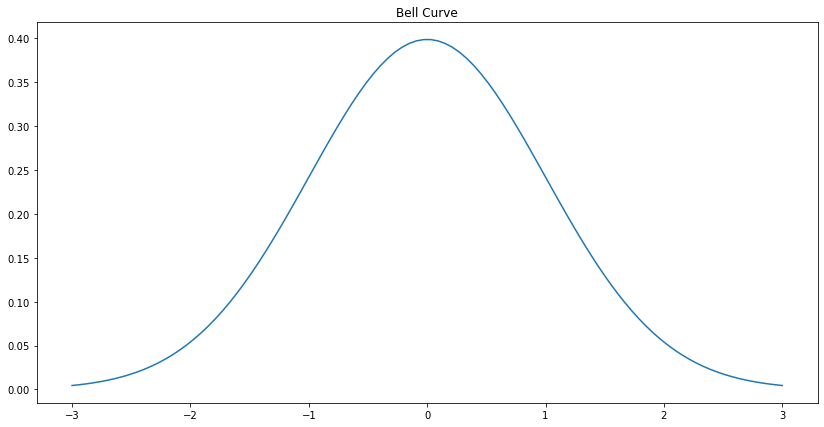

In [2]:
figs=(14,7)
var = 1
sigma = np.sqrt(var)
mean = 0

x = np.linspace(-3, 3, 100)
f = 1/np.sqrt((2*np.pi*var)) * np.exp(-1*np.square(x - mean)/(2*var))

fig, ax1 = plt.subplots(figsize=figs)
ax1.plot(x,f)
plt.title("Bell Curve")
plt.savefig("Bell.png")

## b)

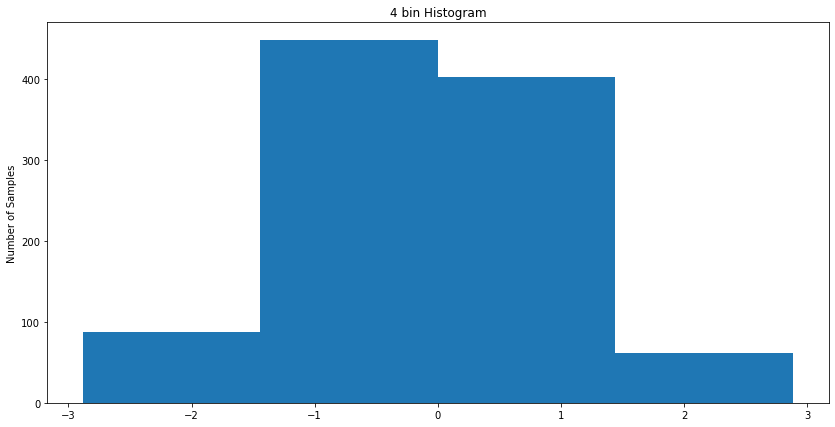

In [3]:
s1 = np.random.normal(mean, sigma, 1000) # Part b i)
fig, ax2 = plt.subplots(figsize=(14,7))

ax2.hist(s1, bins=4)
plt.title("4 bin Histogram")
plt.ylabel("Number of Samples")
plt.show()

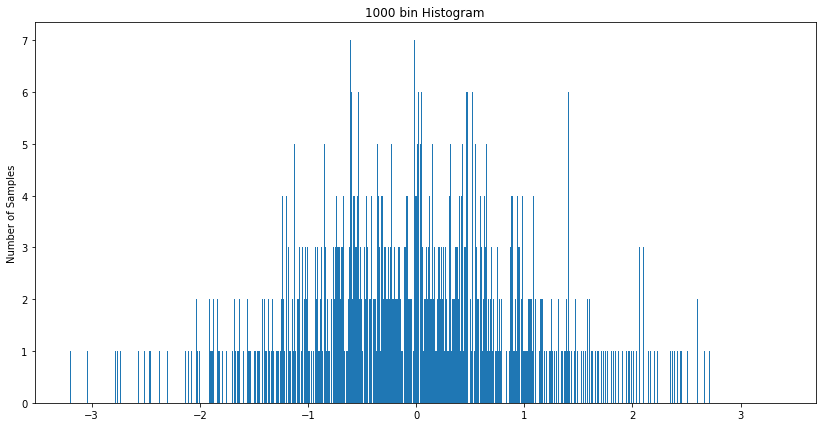

In [4]:
s2 = np.random.normal(mean, sigma, 1000)
fig, ax3 = plt.subplots(figsize=(14,7))

ax3.hist(s2, bins=1000)
plt.title("1000 bin Histogram")
plt.ylabel("Number of Samples")
plt.show()

In [5]:
mu, var = scipy.stats.norm.fit(s1)
print("Mean of the distribution is:", mu)
print("Standard Deviation of the distribution is:", np.sqrt(var))

Mean of the distribution is: -0.08416359186152249
Standard Deviation of the distribution is: 0.9917046229214086


## c)

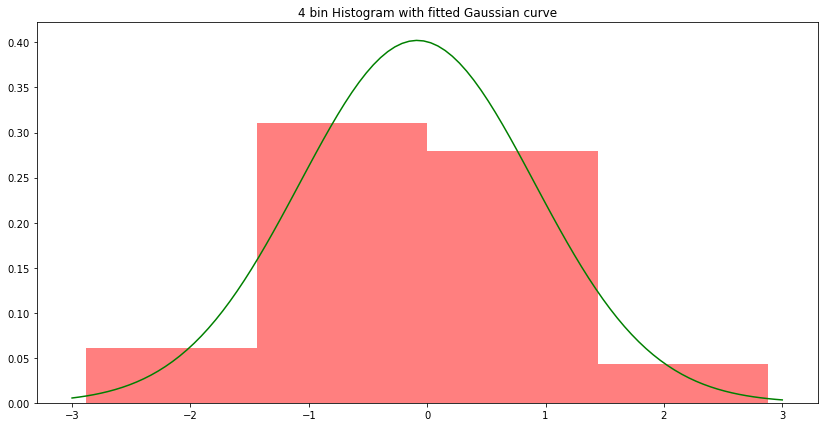

In [6]:
s3 = scipy.stats.norm.pdf(x, mu, np.sqrt(var))
fig, ax3 = plt.subplots(figsize=(14,7))
ax3.hist(s1, density=True, histtype='stepfilled', alpha=0.5, bins=4, color='red')
ax3.plot(x,s3, color='green')
plt.title("4 bin Histogram with fitted Gaussian curve")
plt.show()

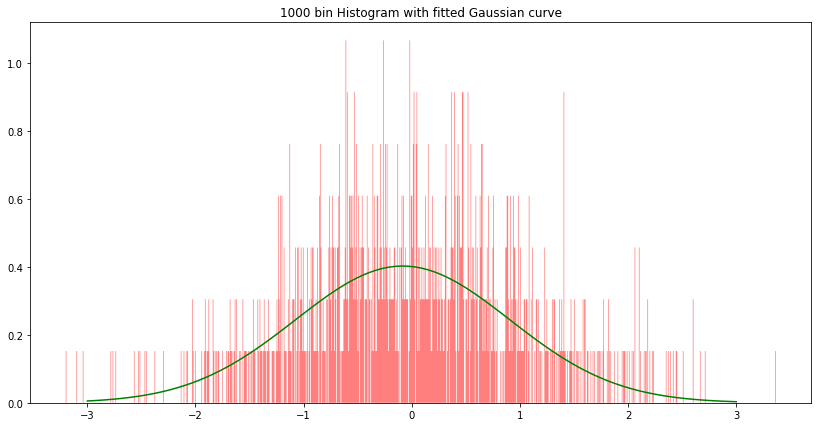

In [7]:
fig, ax4 = plt.subplots(figsize=(14,7))
ax4.hist(s2, density=True, histtype='stepfilled', alpha=0.5, bins=1000, color='red')
ax4.plot(x,s3, color='green')
plt.title("1000 bin Histogram with fitted Gaussian curve")
plt.show()

In [8]:
J_array = []
n = 1000
h_avg = 0
for i in range(50):
    for m in range(1,201):
        hist, bins = np.histogram(s1, m)
        h = (max(s1) - min(s1))/m

        p = 0
        for j in range(0, m):
            p = p + (hist[j]/n)**2
        
        J = 2/(h*(n-1)) - (n+1)/(h*(n-1))*p

        J_array.append(J)

    h_star = np.argmin(J_array)
    h_avg = h_avg + h_star

print(h_avg/50)

print("Optimal number of bins = {0}".format(h_star))

15.0
Optimal number of bins = 15


ValueError: x and y must have same first dimension, but have shapes (200,) and (10000,)

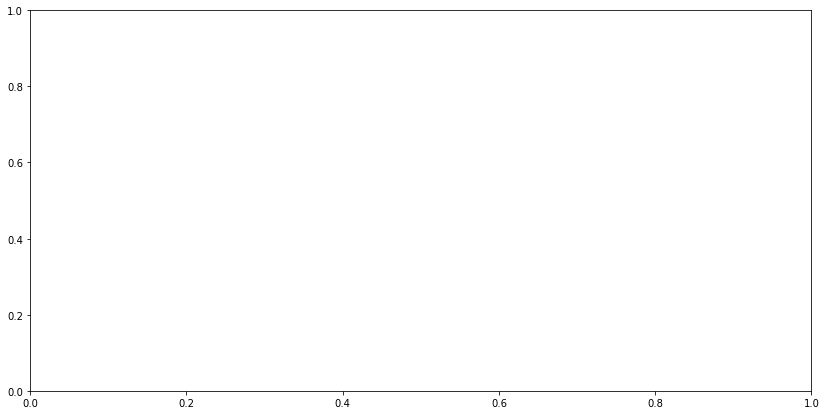

In [9]:
fig, ax5 = plt.subplots(figsize=(14,7))
x_axis = np.arange(1,201)
ax5.plot(x_axis, J_array, color='orange')
ax5.plot(h_star+1, J_array[h_star], marker='*')
plt.xlim((1,200))
plt.title("Risk vs number of bins")
plt.xlabel("Number of bins")
plt.ylabel("Risk")
plt.legend(["Risk", "Bins for minimum risk = {0}".format(h_star)])
plt.show()

In [ ]:
fig, ax5 = plt.subplots(figsize=(14,7))
ax5.hist(s2, density=True, histtype='stepfilled', alpha=0.5, bins=h_star, color='red')
ax5.plot(x,s3, color='green')
plt.title("{0} bin Histogram with fitted Gaussian curve".format(h_star))
plt.show()

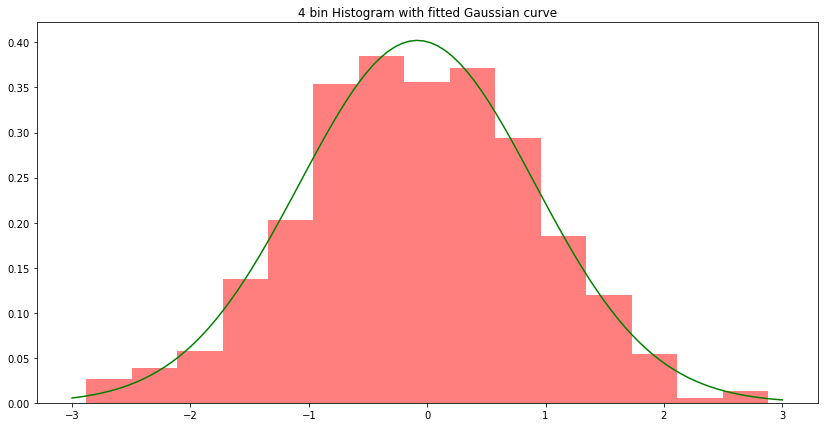

In [10]:
s3 = scipy.stats.norm.pdf(x, mu, np.sqrt(var))
fig, ax3 = plt.subplots(figsize=(14,7))
ax3.hist(s1, density=True, histtype='stepfilled', alpha=0.5, bins=15, color='red')
ax3.plot(x,s3, color='green')
plt.title("4 bin Histogram with fitted Gaussian curve")
plt.show()